# Nikhil Jatti
# PGDM (Business Analytics)
# Vivekanand Business School

# 1. Import and observe dataset

In [1]:
# Import modules
import numpy as np
import pandas as pd
import nltk
import nltk.stem

    
# Set seed for reproducibility
np.random.seed(5)

# Read the dataset
movies_df = pd.read_csv(r"C:\Users\Nikhi\Downloads\netflix_movies.csv")

print("Number of movies loaded: %s " % (len(movies_df)))

# Display the data
movies_df

Number of movies loaded: 6131 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s3,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,s4,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,s5,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
6126,s6127,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
6127,s6128,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
6128,s6129,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
6129,s6130,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [2]:
print(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(1), object(11)
memory usage: 574.9+ KB
None


# 2. Tokenization and Stemming

In [3]:
## A function for both Tokenization and Stemming the column data

def tokenize_and_stem(text):
    # Tokenize the text into words
    tokens = nltk.tokenize.word_tokenize(text)
    # Filter out the tokens that are not alphanumeric
    tokens = [token for token in tokens if token.isalnum()]
    # Stem the tokens using Snowball stemmer
    stemmer = nltk.stem.SnowballStemmer('english')
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

movies_df['New_description'] = movies_df['description'].apply(tokenize_and_stem)
documents = movies_df['New_description'] 

# Print the dataframe column
print(documents)

0       [as, her, father, near, the, end, of, his, lif...
1       [equestria, divid, but, a, hero, believ, earth...
2       [on, a, photo, shoot, in, ghana, an, american,...
3       [a, woman, adjust, to, life, after, a, loss, c...
4       [after, most, of, her, famili, is, murder, in,...
                              ...                        
6126    [recov, alcohol, talal, wake, up, insid, a, po...
6127    [a, polit, cartoonist, a, crime, report, and, ...
6128    [look, to, surviv, in, a, world, taken, over, ...
6129    [drag, from, civilian, life, a, former, superh...
6130    [a, scrappi, but, poor, boy, worm, his, way, i...
Name: New_description, Length: 6131, dtype: object


# 3. Create TfidfVectorizer and Fit transform

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

tfidf_vectorizer = TfidfVectorizer()
documents = [' '.join(doc) for doc in documents]

tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print(tfidf_matrix.shape)

(6131, 11104)


# 4. Import KMeans and create clusters to plot it

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
kmeans = KMeans(n_clusters=5, random_state=92, n_init=10)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=5, n_init=10, random_state=92)

In [7]:
y_pred = kmeans.predict(tfidf_matrix)
centers_pred = kmeans.cluster_centers_
pca = PCA(n_components=2, random_state=92)
tfidf_matrix_reduced = pca.fit_transform(tfidf_matrix.toarray())
centers_reduced = pca.transform(centers_pred)

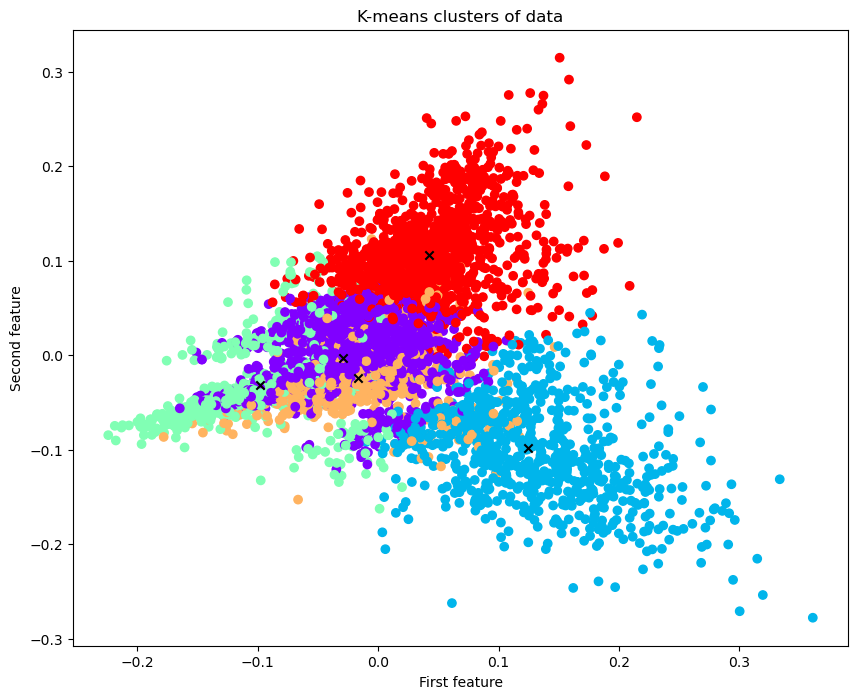

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(tfidf_matrix_reduced[:,0], tfidf_matrix_reduced[:,1], c=y_pred, cmap='rainbow')
plt.scatter(centers_reduced[:,0], centers_reduced[:,1], c='black', marker='x')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('K-means clusters of data')
plt.show()

# 5. Calculate similarity distance

In [9]:
# Import cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = cosine_similarity(tfidf_matrix)
print(similarity_distance)

[[1.         0.01425165 0.03778568 ... 0.01841549 0.02940184 0.13382995]
 [0.01425165 1.         0.01258534 ... 0.01425466 0.         0.02417595]
 [0.03778568 0.01258534 1.         ... 0.02993357 0.01551843 0.04572869]
 ...
 [0.01841549 0.01425466 0.02993357 ... 1.         0.02941206 0.00964091]
 [0.02940184 0.         0.01551843 ... 0.02941206 1.         0.00859894]
 [0.13382995 0.02417595 0.04572869 ... 0.00964091 0.00859894 1.        ]]


# 6. Which movies are most similar?

In [11]:
def recommend(movie):
    movie_index=movies_df[movies_df['title']==movie].index[0]
    distances=similarity_distance[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
    
    for i in movies_list:
        print(movies_df.iloc[i[0]].title)

In [12]:
recommend('Jaws')

Jaws 2
Jaws: The Revenge
Jaws 3
Maya Memsaab
In The Deep
Suicide (Hitabdut)
Iliza Shlesinger: Confirmed Kills
Avengement
Monster High: Escape from Skull Shores
Pinkfong & Baby Shark's Space Adventure
